## 01: Importieren der notwendigen Bibliotheken

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns 

## 02: Datensatz laden und erste Übersicht über den Inhalt

In [71]:
# Datensatz wurde geladen mit folgenden Funktionen:
# df = pd.read_csv("URL")
# df.to_csv("Name der Datei", index=False)

df = pd.read_csv("2017_Yellow_Taxi_Trip_data.csv")

| Name der Spalte            | Beschreibung                                                                                                                                                                                                                                                    |
|----------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ID                         | Identifikationsnummer der Reise                                                                                                                                                                                                                                 |
| AnbieterID                 | Ein Code, der den TPEP-Anbieter angibt, von dem der A-Eintrag stammt. 1= Kreative Mobile Technologien, LLC; 2= VeriFone Inc.                                                                                                                                     |
| tpep_pickup_datetime       | Das Datum und die Uhrzeit, zu der das Messgerät eingeschaltet wurde.                                                                                                                                                                                            |
| tpep_dropoff_datetime      | Datum und Uhrzeit, zu der der Zähler ausgeschaltet wurde.                                                                                                                                                                                                       |
| Fahrgast_Anzahl            | Die Anzahl der Fahrgäste im Fahrzeug. Dies ist ein vom Fahrer eingegebener Wert.                                                                                                                                                                                |
| Fahrt_Entfernung           | Die vom Taxameter gemeldete zurückgelegte Strecke in Meilen.                                                                                                                                                                                                    |
| PULocationID               | TLC-Taxizone, in der der Taxameter eingesetzt wurde                                                                                                                                                                                                             |
| DOLocationID               | TLC-Taxizone, in der der Taxameter ausgeschaltet wurde                                                                                                                                                                                                          |
| TarifCodeID                | Der endgültige Tarifcode, der am Ende der Fahrt gilt. 1= Standardtarif; 2=JFK; 3=Newark; 4=Nassau oder Westchester; 5=Nachverhandelter Tarif; 6=Gruppenfahrt                                                                                                      |
| Store_and_fwd_flag         | Dieses Kennzeichen gibt an, ob der A-Eintrag im Fahrzeugspeicher gehalten wurde, bevor er an den Verkäufer gesendet wurde, auch bekannt als "store and forward", weil das Fahrzeug keine Verbindung zum Server hatte. Y= Fahrt mit Speicherung und Weiterleitung; N= keine Store-and-Forward-Reise |
| Zahlungsart                | Ein numerischer Code, der angibt, wie der Fahrgast die Fahrt bezahlt hat. 1= Kreditkarte; 2= Bargeld; 3= Keine Gebühr; 4= Anfechtung; 5= Unbekannt; 6= Stornierte Fahrt                                                                                           |
| Fahrpreis_Betrag           | Der vom Zähler berechnete Fahrpreis für Zeit und Strecke.                                                                                                                                                                                                       |
| Extra                      | Verschiedene Extras und Zuschläge. Derzeit sind hier nur die Gebühren für die Hauptverkehrszeit und die Nachtfahrt in Höhe von 0,50 $ und 1 $ enthalten.                                                                                                          |
| MTA_tax                    | 0,50 $ MTA-Steuer, die automatisch auf der Grundlage des verwendeten Zählertarifs ausgelöst wird.                                                                                                                                                               |
| Verbesserungszuschlag      | 0,30 $ Verbesserungszuschlag, der bei Fahrten an der Haltestelle erhoben wird. Der Verbesserungszuschlag wird seit 2015 erhoben.                                                                                                                                |
| Trinkgeld_Betrag           | Trinkgeldbetrag - Dieses Feld wird automatisch für Trinkgelder mit Kreditkarten ausgefüllt. Trinkgelder in bar sind nicht enthalten.                                                                                                                             |
| Maut_Betrag                | Gesamtbetrag aller während der Fahrt gezahlten Mautgebühren.                                                                                                                                                                                                    |
| Gesamt_Betrag              | Der Gesamtbetrag, der den Fahrgästen berechnet wurde. Trinkgelder sind nicht enthalten.                                                                                                                                                                          |


In [72]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [73]:
df.sample(n=15)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
19211,40428663,2,05/18/2017 11:16:13 PM,05/18/2017 11:23:39 PM,1,1.81,1,N,48,239,2,8.0,0.5,0.5,0.00,0.0,0.3,9.30
19113,12167116,1,02/16/2017 8:36:13 AM,02/16/2017 8:41:21 AM,1,0.20,1,N,88,87,2,5.0,0.0,0.5,0.00,0.0,0.3,5.80
9823,95409905,2,11/10/2017 8:19:42 PM,11/10/2017 8:26:27 PM,1,1.36,1,N,263,74,1,7.0,0.5,0.5,1.66,0.0,0.3,9.96
21808,40113358,1,05/18/2017 5:41:50 AM,05/18/2017 5:46:58 AM,1,1.40,1,N,186,246,2,6.5,0.5,0.5,0.00,0.0,0.3,7.80
2131,83548680,1,10/04/2017 11:11:48 PM,10/04/2017 11:22:17 PM,1,2.10,1,N,170,144,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
927,39261472,2,05/21/2017 7:26:49 PM,05/21/2017 7:40:31 PM,2,2.35,1,N,42,75,1,11.5,0.0,0.5,0.00,0.0,0.3,12.30
12604,21406577,1,03/15/2017 2:46:34 PM,03/15/2017 2:54:23 PM,1,0.90,1,N,87,45,4,6.5,0.0,0.5,0.00,0.0,0.3,7.30
10318,34025452,2,04/24/2017 9:23:05 PM,04/24/2017 9:25:04 PM,2,0.29,1,N,114,113,1,3.5,0.5,0.5,0.96,0.0,0.3,5.76
11443,87426389,2,10/17/2017 10:34:39 AM,10/17/2017 11:28:37 AM,2,8.18,1,N,138,162,1,38.5,0.0,0.5,0.00,0.0,0.3,39.30
8244,76036183,1,09/10/2017 11:25:50 AM,09/10/2017 11:34:51 AM,3,1.10,1,N,211,231,1,7.5,0.0,0.5,1.33,0.0,0.3,9.63


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

* Dtypes der Datumsspalten sind als object gekennzeichnet.
* Diese müssen noch umgewandelt werden

In [75]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


* In Bezug auf den Fahrpreis ist die Verteilung eine Überlegung wert. 
* Der maximale Fahrpreis ist ein viel größerer Wert (1000 $) als der Wertebereich von 25-75 Prozent. 
* Außerdem ist es fraglich, wie es negative Werte für den Fahrpreis geben kann. 
* In Bezug auf die Fahrtstrecke liegen die meisten Fahrten zwischen 1 und 3 Meilen, aber das Maximum liegt bei über 33 Meilen.

In [76]:
# Alle Werte bei denen keine Einträge gefunden wurden
df.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

## 03: Bearbeitung / Bereinigung des Datensatzes

In [77]:
# Umwandlung der Datumsspalten in die richtigen Datentypen (datetime)

df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

## 04: Tieferes Verständnis der Daten

In [78]:
# Sortieren der Daten nach der gefahrenen Distanz weil die durchschnittliche Fahrt etwa 3 Meilen ist und der Median auch bei 3,7 Meilen liegt
# gefiltert von Maximum nach Minimum

df_sort = df.sort_values(by=['trip_distance'],ascending=False)
df_sort.head(15)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9280,51810714,2,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
6064,49894023,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
10291,76319330,2,2017-09-11 11:41:04,2017-09-11 12:18:58,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
29,94052446,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
18130,90375786,1,2017-10-26 14:45:01,2017-10-26 16:12:49,1,30.50,1,N,132,220,1,90.50,0.0,0.5,19.85,8.16,0.3,119.31
5792,68023798,2,2017-08-11 14:14:01,2017-08-11 15:17:31,1,30.33,2,N,132,158,1,52.00,0.0,0.5,14.64,5.76,0.3,73.20
15350,77309977,2,2017-09-14 13:44:44,2017-09-14 14:34:29,1,28.23,2,N,13,132,1,52.00,0.0,0.5,4.40,5.76,0.3,62.96
10302,43431843,1,2017-05-15 08:11:34,2017-05-15 09:03:16,1,28.20,2,N,90,132,1,52.00,0.0,0.5,11.71,5.76,0.3,70.27
2592,51094874,2,2017-06-16 18:51:20,2017-06-16 19:41:42,1,27.97,2,N,261,132,2,52.00,4.5,0.5,0.00,5.76,0.3,63.06


In [79]:
# Fahrten mit keiner zurückgelegten Distanz aber teilweise hohen Kosten

df_sort.tail(15)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
16712,74111770,1,2017-09-03 20:30:00,2017-09-03 20:32:19,4,0.0,1,N,163,163,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
10923,99374615,2,2017-11-23 13:45:55,2017-11-23 13:47:18,1,0.0,1,N,193,193,1,3.0,0.0,0.5,0.00,0.0,0.3,3.80
795,101135030,1,2017-11-30 07:11:34,2017-11-30 07:11:34,1,0.0,1,N,246,264,2,8.0,0.0,0.5,0.00,0.0,0.3,8.80
6485,93959863,1,2017-11-06 14:56:21,2017-11-06 14:56:44,1,0.0,3,N,1,1,4,20.0,0.0,0.0,0.00,0.0,0.3,20.30
19636,8288479,2,2017-02-04 06:44:24,2017-02-04 06:44:25,2,0.0,5,N,244,244,1,59.0,0.0,0.0,11.86,0.0,0.3,71.16
13359,3055315,1,2017-01-12 07:19:36,2017-01-12 07:19:56,1,0.0,5,N,1,1,1,75.0,0.0,0.0,18.65,18.0,0.3,111.95
5588,85254119,2,2017-10-10 16:26:12,2017-10-10 16:26:26,1,0.0,1,N,170,170,1,2.5,1.0,0.5,5.20,0.0,0.3,9.50
20931,47340765,1,2017-06-29 19:27:02,2017-06-29 19:27:22,1,0.0,1,N,162,162,3,2.5,1.0,0.5,0.00,0.0,0.3,4.30
19712,1324241,1,2017-01-05 12:40:16,2017-01-05 12:40:23,1,0.0,1,N,48,48,1,2.5,0.0,0.5,0.95,0.0,0.3,4.25
13827,1514377,1,2017-01-20 08:40:05,2017-01-20 08:40:25,1,0.0,1,N,238,238,1,2.5,0.0,0.5,0.65,0.0,0.3,3.95


In [80]:
# Sortiert nach total_amount
# Die 20 höchsten Werte
# Die obersten zwei Werte sind signifikant höher als die Werte ab Platz 3

total_amount_sorted = df.sort_values(
    ['total_amount'], ascending=False)['total_amount']
total_amount_sorted.head(20)

8476     1200.29
20312     450.30
13861     258.21
12511     233.74
15474     211.80
6064      179.06
16379     157.06
3582      152.30
11269     151.82
9280      150.30
1928      137.80
10291     131.80
6708      126.00
11608     123.30
908       121.56
7281      120.96
18130     119.31
13621     115.94
13359     111.95
29        111.38
Name: total_amount, dtype: float64

In [81]:
# Die niedrigsten Einnahmen 
# Negative Werte bei Fahrten
# 14 Werte von 22699 Werten 

total_amount_sorted.tail(20)

14283      0.31
19067      0.30
10506      0.00
5722       0.00
4402       0.00
22566      0.00
1646      -3.30
18565     -3.80
314       -3.80
5758      -3.80
5448      -4.30
4423      -4.30
10281     -4.30
8204      -4.80
20317     -4.80
11204     -5.30
14714     -5.30
17602     -5.80
20698     -5.80
12944   -120.30
Name: total_amount, dtype: float64

In [82]:
# How many of each payment type are represented in the data?
# Sortiert nach der Anzahl der Bezahlungen nach Bezahlmethode
# Die meisten Zahlungen finden mit Kreditkarte statt und die zwei tmeisten mit Bargeld

df['payment_type'].value_counts()

payment_type
1    15265
2     7267
3      121
4       46
Name: count, dtype: int64

In [83]:
# Durchschnittliches Trinkgeld mit Kreditkarte
# Liegt bei 2.38$

avg_cc_tip = df[df['payment_type']==1]['tip_amount'].mean()
print('Avg. cc tip:', avg_cc_tip)


# Durchschnittliches Trinkgeld in Bar
# Liegt bei 0$

avg_cash_tip = df[df['payment_type']==2]['tip_amount'].mean()
print('Avg. cash tip:', avg_cash_tip)

Avg. cc tip: 2.7298001965280054
Avg. cash tip: 0.0


In [84]:
# Nach Kreditkartenzahlungen gefiltert

credit_card = df[df['payment_type']==1]

# Durchschnittliches Trinkgeld mit Kreditkarte nach Anzahl der Passagiere

credit_card.groupby(['passenger_count']).mean(numeric_only=True)[['tip_amount']]


,tip_amount
passenger_count,
0,2.610370
1,2.714681
2,2.829949
3,2.726800
4,2.607753
5,2.762645
6,2.643326


## 05: Visualisierungen

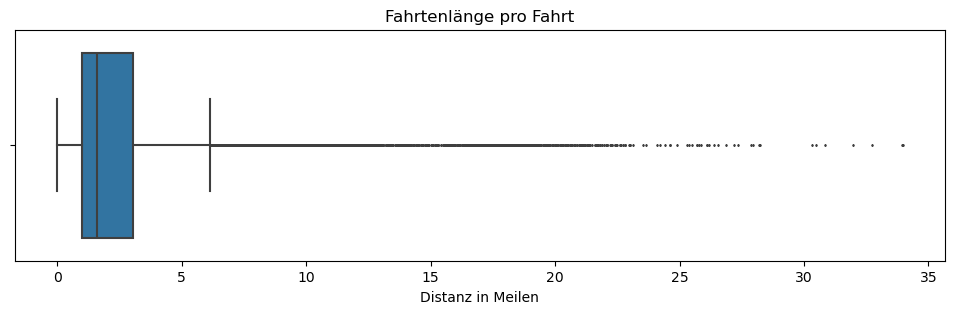

In [85]:
# Boxplot für die Verteilung der gefahrenen Strecken

plt.figure(figsize=(12,3))
plt.title('Fahrtenlänge pro Fahrt')
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1)
plt.xlabel(xlabel="Distanz in Meilen")
plt.show()

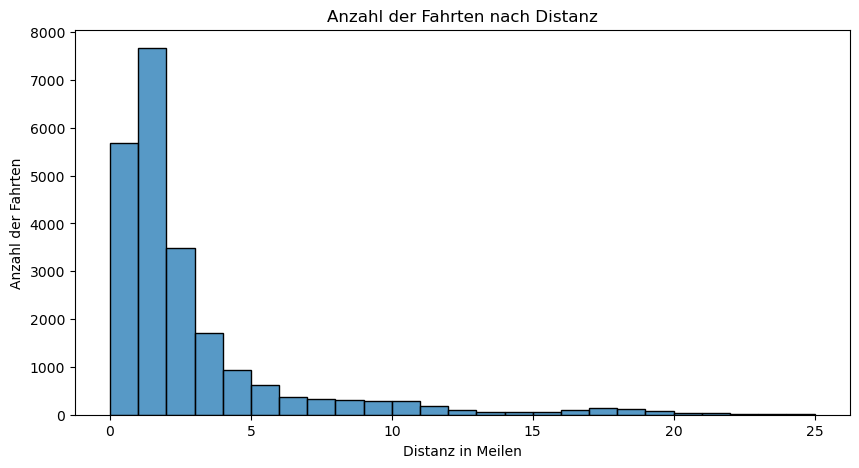

In [86]:
# Histogramm der gefahrenen Strecken

plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins=range(0,26,1))
plt.title('Anzahl der Fahrten nach Distanz')
plt.xlabel(xlabel="Distanz in Meilen")
plt.ylabel(ylabel="Anzahl der Fahrten")
plt.show()

# Die meisten Fahrten sind unter 2 Meilen

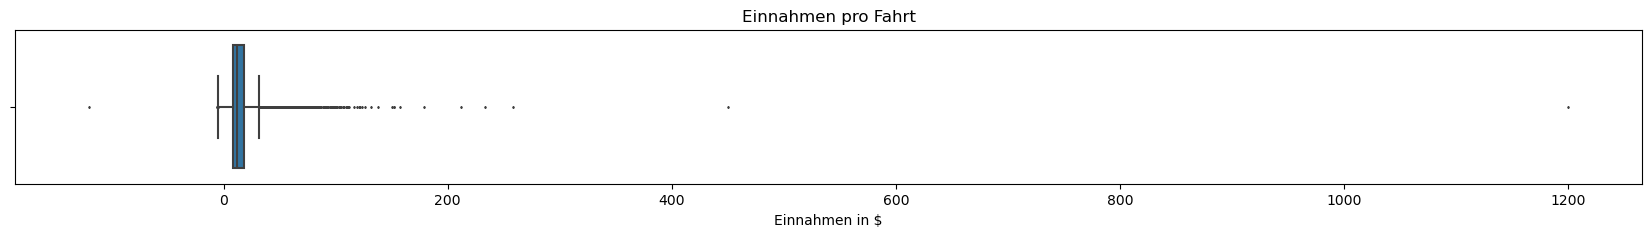

In [87]:
# Box Plot der Einnahmen

plt.figure(figsize=(21,2))
plt.title('Einnahmen pro Fahrt')
sns.boxplot(x=df['total_amount'], fliersize=1)
plt.xlabel(xlabel="Einnahmen in $")
plt.show()


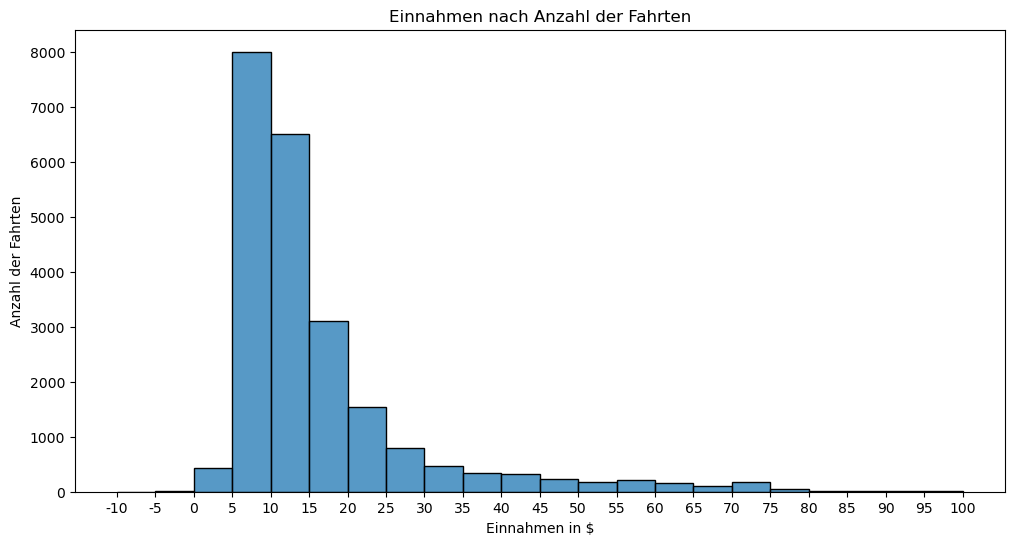

In [88]:
# Histogramm der Einnahmen

plt.figure(figsize=(12,6))
ax = sns.histplot(df['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('Einnahmen nach Anzahl der Fahrten')
plt.xlabel(xlabel="Einnahmen in $")
plt.ylabel(ylabel="Anzahl der Fahrten")
plt.show()

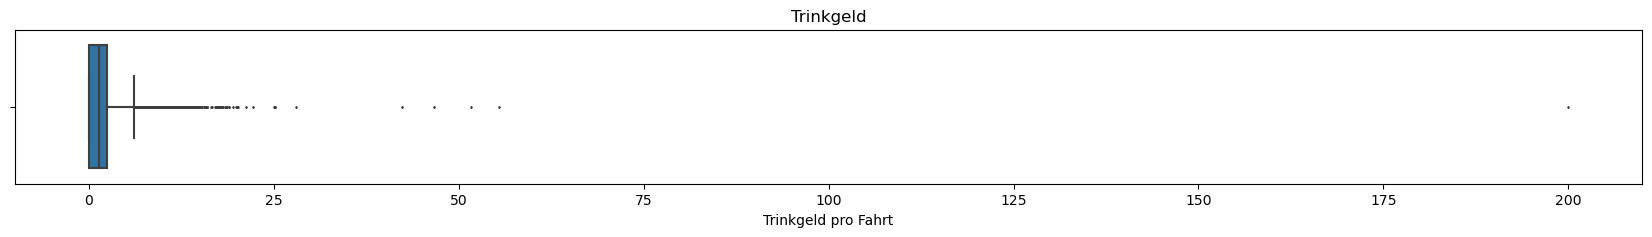

In [89]:
# box plot für Trikgeld

plt.figure(figsize=(21,2))
plt.title('Trinkgeld')
sns.boxplot(x=df['tip_amount'], fliersize=1)
plt.xlabel(xlabel="Trinkgeld pro Fahrt")
plt.show()

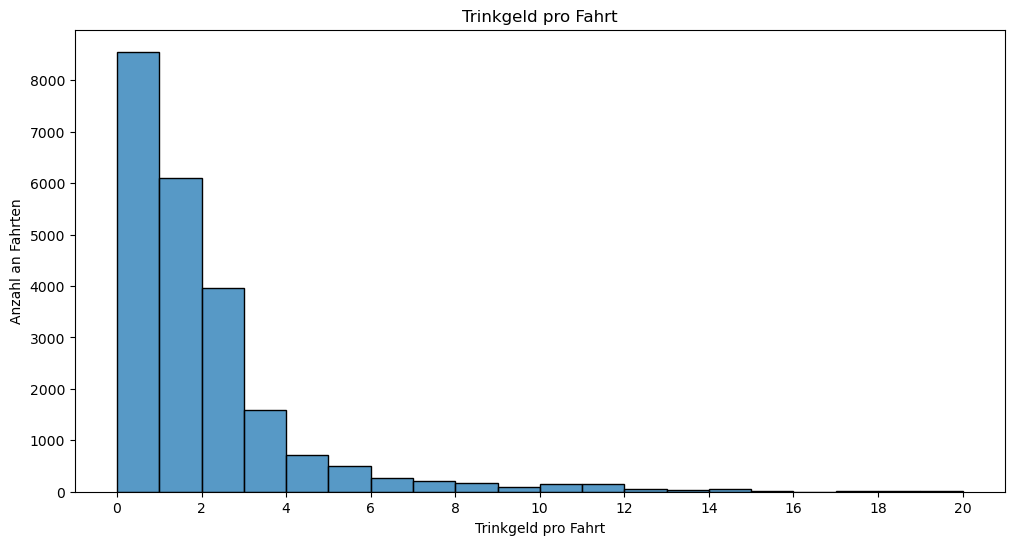

In [90]:
# Create histogram of tip_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Trinkgeld pro Fahrt')
plt.xlabel(xlabel="Trinkgeld pro Fahrt")
plt.ylabel(ylabel="Anzahl an Fahrten")
plt.show()

In [91]:
# Das durschnittliche Trinkgeld nach Anzahl der Fahrgäste 

mean_tips_by_passenger_count = df.groupby('passenger_count')[['tip_amount']].mean()
mean_tips_by_passenger_count


,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


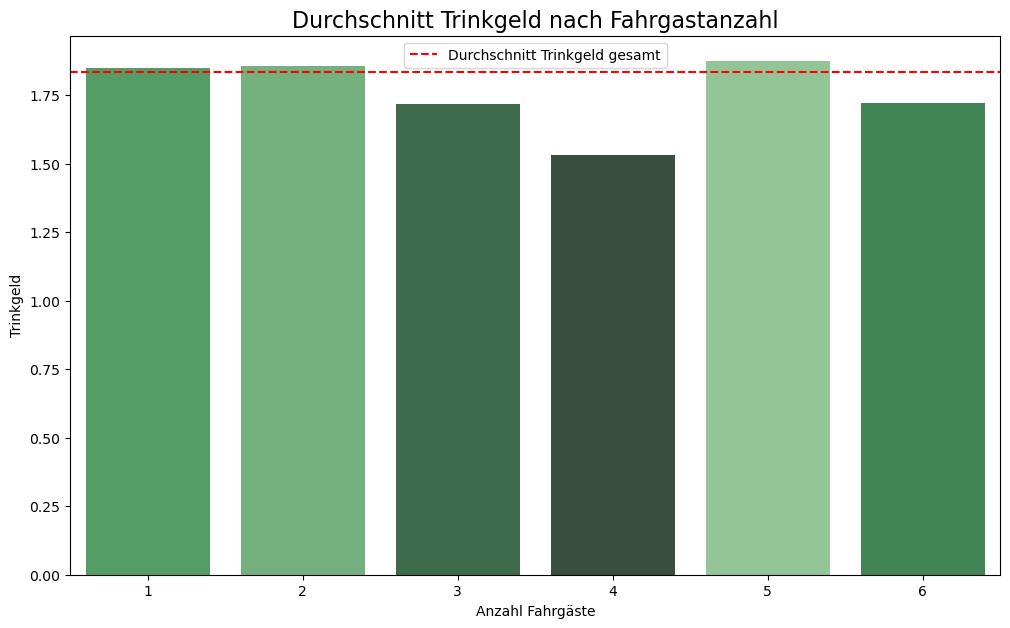

In [92]:
data = mean_tips_by_passenger_count.tail(-1)
pal = sns.color_palette("Greens_d", len(data))
rank = data['tip_amount'].argsort().argsort()
plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index,
            y=data['tip_amount'],
            palette=np.array(pal[::-1])[rank])
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='Durchschnitt Trinkgeld gesamt')
ax.legend()
plt.title('Durchschnitt Trinkgeld nach Fahrgastanzahl', fontsize=16)
plt.xlabel(xlabel="Anzahl Fahrgäste")
plt.ylabel(ylabel="Trinkgeld")
plt.show()

In [93]:
# Column Monat neu

df['month'] = df['tpep_pickup_datetime'].dt.month_name()

# Column Tag neu
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

In [94]:
# Alle Fahrten pro Monat
monthly_rides = df['month'].value_counts()
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

In [95]:
# Neuordnung der Monate
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

In [96]:
# Überprüfung der Neuordnung

monthly_rides.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='month')

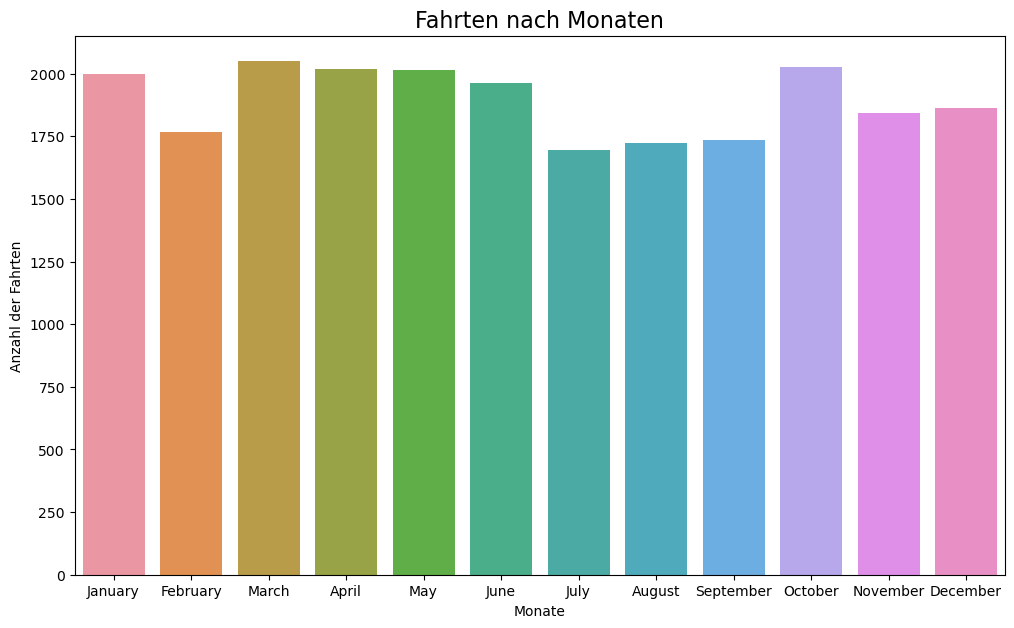

In [97]:
# bar plot aller Fahrten nach Monat

plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_xticklabels(month_order)
plt.title('Fahrten nach Monaten', fontsize=16)
plt.ylabel(ylabel="Anzahl der Fahrten")
plt.xlabel(xlabel="Monate")
plt.show()

In [98]:
# Fahrten an Wochentagen

daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

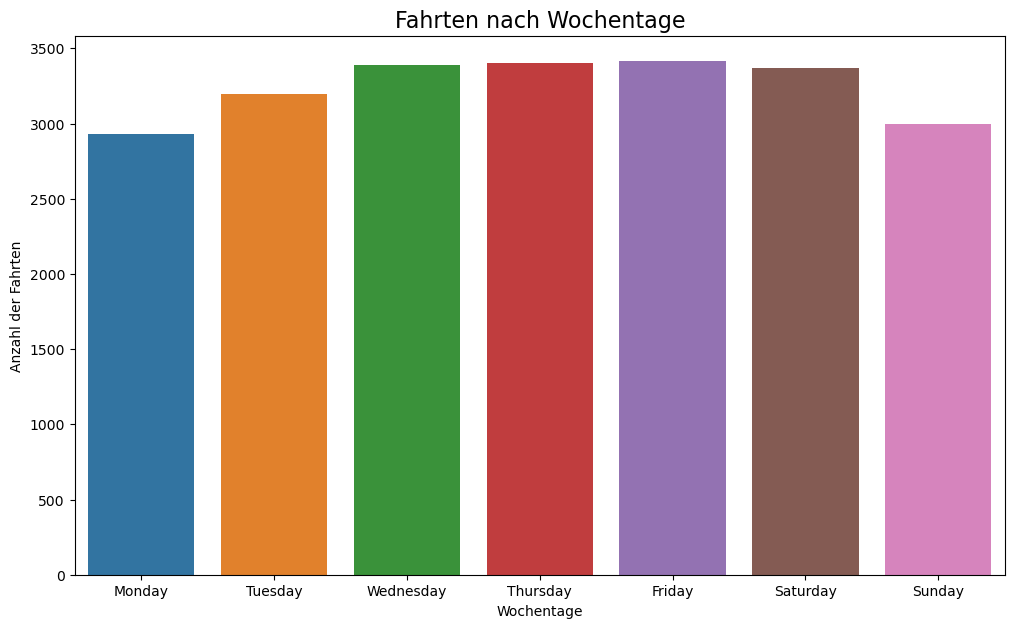

In [99]:
# bar plot für Anzahl der Fahrten nach Wochentagen

plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index, y=daily_rides)
ax.set_xticklabels(day_order)
ax.set_ylabel('Count')
plt.title('Fahrten nach Wochentage', fontsize=16)
plt.xlabel(xlabel="Wochentage")
plt.ylabel(ylabel="Anzahl der Fahrten")
plt.show()

In [100]:
# Einnahmen pro Tag

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_amount_day = df.groupby('day')[['total_amount']].sum()
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


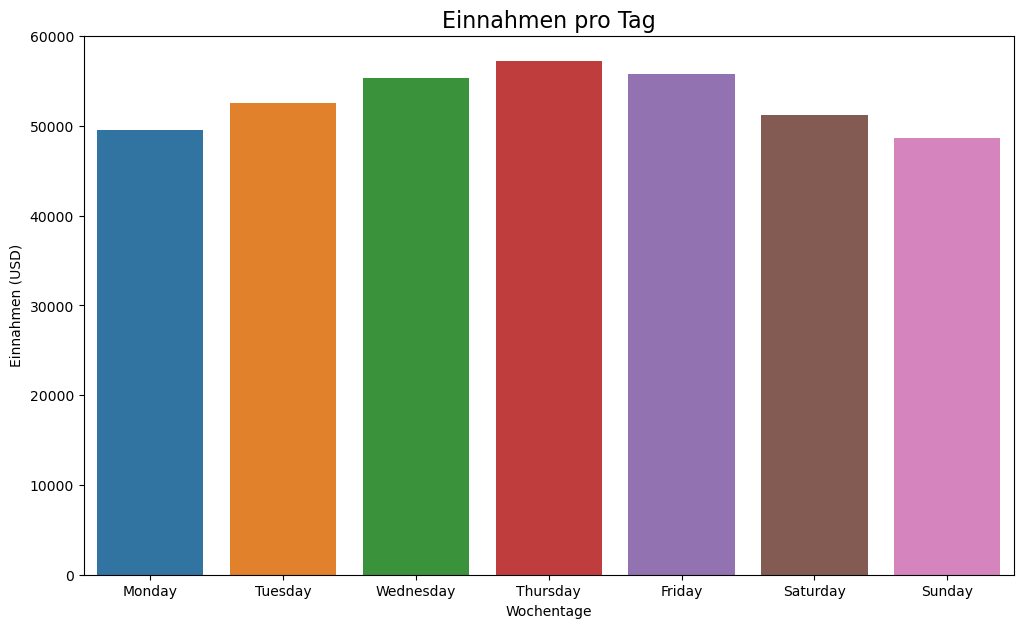

In [101]:
# Gewinn pro Tag

plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'])
ax.set_xticklabels(day_order)
ax.set_ylabel('Einnahmen (USD)')
plt.title('Einnahmen pro Tag', fontsize=16)
plt.xlabel(xlabel="Wochentage")
plt.show()

In [102]:
# Einnahmen pro Monat

total_amount_month = df.groupby('month')[['total_amount']].sum()
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


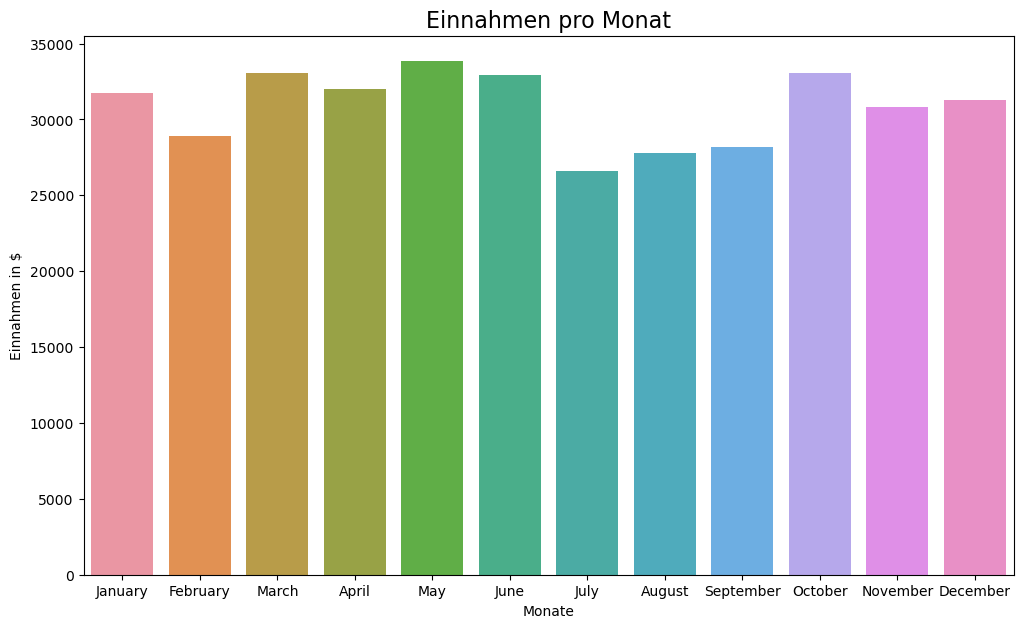

In [103]:
#  bar plot Einnahmen pro Monat

plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'])
plt.title('Einnahmen pro Monat', fontsize=16)
plt.xlabel(xlabel="Monate")
plt.ylabel(ylabel="Einnahmen in $")
plt.show()